In [1]:
import pandas as pd
import matplotlib.pyplot as plt

CNL_FILE = 'data/41586_2020_3052_MOESM4_ESM.txt'
cnl_df_raw = pd.read_table(CNL_FILE, sep='\t')
print('cnl_df\n', cnl_df_raw)

RL_FILE = 'data/41586_2020_3052_MOESM6_ESM.txt'
rl_df_raw = pd.read_table(RL_FILE, sep='\t')
print('rl_df\n', rl_df_raw)

TL_FILE = 'data/41586_2020_3052_MOESM8_ESM.txt'
tl_df_raw = pd.read_table(TL_FILE, sep='\t')
print('tl_df\n', tl_df_raw)

CHRV_FILE = 'data/41586_2020_3052_MOESM9_ESM.txt'
chrvl_df_raw = pd.read_table(CHRV_FILE, sep='\t')
print('chrvl_df\n', chrvl_df_raw)

LIBL_FILE = 'data/41586_2020_3052_MOESM11_ESM.txt'
libl_df_raw = pd.read_table(LIBL_FILE, sep='\t')
print('libl_df\n', libl_df_raw)

print(cnl_df_raw.keys())

cnl_df
        Sequence #                                           Sequence  \
0               1  TTTCTTCACTTATCTCCCACCGTCCACTCATGCGGGTGCTATGATA...   
1               2  TTTCTTCACTTATCTCCCACCGTCCGGATCTATAACGAAATGTCAA...   
2               3  TTTCTTCACTTATCTCCCACCGTCCATCAATAATTTATGTTCTTAA...   
3               4  TTTCTTCACTTATCTCCCACCGTCCAAAATAATTAGAAAGTAGCAC...   
4               5  TTTCTTCACTTATCTCCCACCGTCCCTTGAGAACCAAAAAAAAAAA...   
...           ...                                                ...   
19902       19903  TTTCTTCACTTATCTCCCACCGTCCCTTATTGTGAACATCATGACA...   
19903       19904  TTTCTTCACTTATCTCCCACCGTCCTTTGTTATTTTTATTAGTAGA...   
19904       19905  TTTCTTCACTTATCTCCCACCGTCCAGCAAGCAATAGCTGCAACAT...   
19905       19906  TTTCTTCACTTATCTCCCACCGTCCCTTATAACTCTATATTAATCC...   
19906       19907  TTTCTTCACTTATCTCCCACCGTCCGGTAAATGGCACAAGTAATAG...   

        Cyclizability (n=26)   Cyclizability (n=29)   Cyclizability (n=31)  \
0                   0.406731              -0.1062

## Preprocessing
- Use Columns: Sequence #, Sequence, C0 
- Get rid of 25 bp left and right adapters 
- Save in csv format 

In [2]:
def preprocess(df, file_name):
    columns = ["Sequence #", "Sequence", " C0"]
    df = df[columns]
    df.columns = ["Sequence #", "Sequence", "C0"]
    
    for i in range(len(df)):
        df.at[i, 'Sequence'] = df['Sequence'][i][25:-25] 
    
    df.to_csv(f'data/{file_name}.csv', index=False)
    
    return df

cnl_df = preprocess(cnl_df_raw, 'cnl')
rl_df = preprocess(rl_df_raw, 'rl')
tl_df = preprocess(tl_df_raw, 'tl')
chrvl_df = preprocess(chrvl_df_raw, 'chrvl')
libl_df = preprocess(libl_df_raw, 'libl')

print(cnl_df)

       Sequence #                                           Sequence        C0
0               1  ACTCATGCGGGTGCTATGATACAATTATATCTTATTTCCATTCCCA...  0.061849
1               2  GGATCTATAACGAAATGTCAAATAATTTTACGGTAATATAACTTAT... -0.285112
2               3  ATCAATAATTTATGTTCTTAACCTAACATTTGATGACCTTTGATGC...  1.114780
3               4  AAAATAATTAGAAAGTAGCACAATTTTTACAGTAATGTAGCACGCG...  0.414965
4               5  CTTGAGAACCAAAAAAAAAAAAAAAAAAATACTGATCCTTACAGGT...  0.353268
...           ...                                                ...       ...
19902       19903  CTTATTGTGAACATCATGACAAAACGAAATGAGAAAAGACCTTTCC... -0.741148
19903       19904  TTTGTTATTTTTATTAGTAGAGGTTATCAATTTATCCACGAAATTG...  0.090459
19904       19905  AGCAAGCAATAGCTGCAACATTTGGGCCGTTGCTAGAAGTTCCAAT... -0.828450
19905       19906  CTTATAACTCTATATTAATCCAAGTTCACCCTAAAAACAGATAAAA...  1.384206
19906       19907  GGTAAATGGCACAAGTAATAGACAATTTAATGAATAGGGTGTTATG...  0.100711

[19907 rows x 3 columns]


# Visulization
- Histogram

array([[<AxesSubplot:title={'center':'C0'}>]], dtype=object)

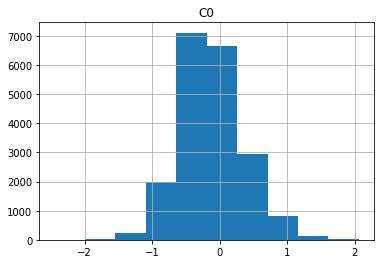

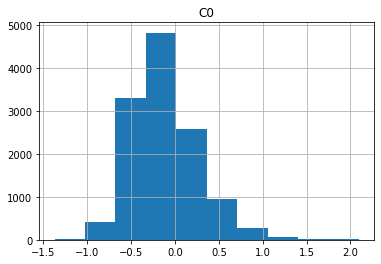

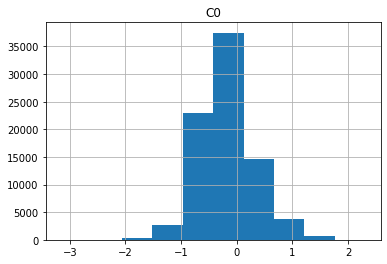

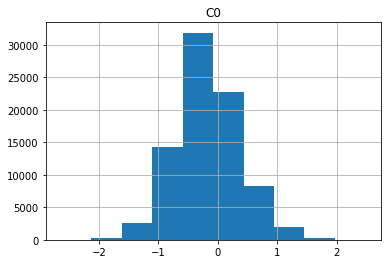

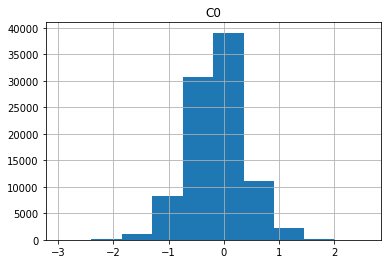

In [3]:
cnl_df.hist(column=['C0'])
rl_df.hist(column=['C0'])
tl_df.hist(column=['C0'])
chrvl_df.hist(column=['C0'])
libl_df.hist(column=['C0'])

# Comparison of C0 values of same sequences

     Sequence #x                                           Sequence       C0x  \
0            156  CAAACTGTCAGAGTTCTGGTTCAAGTTCCTGTCCAACGATGTTCGT... -0.518646   
1            562  GCTTCCTGGGGCATATTTTGTTAGGTTTTATTATTATGTTATTCAA...  0.829256   
2            719  AGTCGGAAGGTTACAAATGATTCATTAAACATGGGATCGTTATACG... -0.398306   
3            739  TGTTTTCCTATGATGACCAACCTTTGGAATTGGGTAATTCTAGGTG... -0.513404   
4           1264  GTCTTGAAGACCGTGAAGAAGGCTTCCAAGGCCAAGAATGTTAAAA...  0.079920   
..           ...                                                ...       ...   
107        19427  CCCTCCTATACCGAAGATGCAACTTTCATGGAAGGATATCCCTACT... -0.058800   
108        19606  CCCAACTTAGGATCCTTTTGAACCTCAAGAACTTAAAATGTCTCAA... -0.161593   
109        19749  CCTAAGCAGGAGAATGGCGGTATCTCGAAGCAGCCTGCGACACCAG... -0.350314   
110        19788  TCTGAAGAAGAATTCGAGGGTGAAAATCCAGCCGATAAAAGAAGGA... -0.639867   
111        19861  GCTACTTTTTAAGAGCGTTCCATCATTTCCACTTTAAAACCAGTCC... -0.239393   

     Sequence #y       C0y 

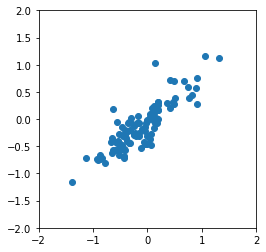

In [4]:
from scipy.stats import pearsonr
from sklearn.metrics import r2_score

def get_intersection(df1, df2):
    merged_df = pd.merge(df1, df2, how='inner', on=['Sequence'])
    merged_df.columns = merged_df.columns.str.replace('_','')

    return merged_df 

# CNL - TL; CNL - ChrV; RL - LibL 
common_df = get_intersection(cnl_df, tl_df)
print(common_df)
plt.scatter(common_df['C0x'], common_df['C0y'])
plt.axis('square')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
corr, _ = pearsonr(common_df['C0x'], common_df['C0y'])
print('Pearsons correlation: %.3f' % corr)

print('r2 score: ', r2_score(common_df['C0x'], common_df['C0y']))

# Sort data

In [27]:
import math 

def sorted_split(df, n=1000, n_bins=1, ascending=False):
    """
    Sort data according to C0 value 
    params:
        df: dataframe 
        n: Top n data to use 
        n_bins: Number of bins(dataframes) to split to 
        ascending: sort order
    returns:
        A list of dataframes.
    """
    sorted_df = df.sort_values(by=['C0'], ascending=ascending)[0:n]
    
    return [ sorted_df.iloc[start_pos : start_pos + math.ceil(n / n_bins)] 
                for start_pos in range(0, n, math.ceil(n / n_bins)) ]   

# sorted_dfs = sorted_split(rl_df, n=len(rl_df), n_bins=12)

most_1000_loopable_df = sorted_split(rl_df, n=1000, n_bins=1, ascending=False)[0]
least_1000_loopable_df = sorted_split(rl_df, n=1000, n_bins=1, ascending=True)[0]
print(most_1000_loopable_df)
print(least_1000_loopable_df)
most_1000_loopable_df['Sequence'].to_csv('./data/rl_most_1000.txt', sep=' ', index=False, header=False)
least_1000_loopable_df['Sequence'].to_csv('./data/rl_least_1000.txt', sep=' ', index=False, header=False)

       Sequence #                                           Sequence        C0
571           572  CCCGATGGTCCACATGCTCCTTAGAAGAGCTAGCCGTCGATAGACC...  2.096725
8160         8161  GTTCTGGGTTAATACTGATCGGAAGAGCAAGTGGGCTCAGTCAACA...  2.066309
2085         2086  AAATTGCCTGCTCTTCCTGCGACCAGTCCTCTCGACGCCCGGGCGC...  1.932010
4434         4435  GGAAAGCGTTAGGAACTCGATTGACTGTCGTCACAGGAAGAGCACC...  1.918451
3084         3085  CCTGGTCTGGTACAGTGAGGCTCTTCGTAGAGTCACAGAGGAGGGT...  1.910780
...           ...                                                ...       ...
6906         6907  ATTTTCTTGCAACGGGGGATCCTGGGATAGGAGAATACCGCGGTAC...  0.447153
2161         2162  CGCAGAACGTCCGTAAACAGCCATGAAGATGAGAAAAGATCCTGGT...  0.446682
4528         4529  GTAGTTTTTAACCAATAATAACATACTCGGAACGAAAGATTTCGAA...  0.446012
11687       11688  AAGTAGGAGGGTTTACCCTCGCTCGGAGGGTTGTAACATTACGAAC...  0.445580
5259         5260  TAAACAACCGAGGTCAGCTCGATTTATTGGGTGCATTAGCCTGTCA...  0.445473

[1000 rows x 3 columns]
       Sequence #          

## Draw shape value vs. base pair position

(1000, 50)
(1000, 50)
[[None None -2.92 -7.15 -8.32 -7.48 -4.33 -6.17 -7.55 -5.78 -3.48 -7.33
  -8.83 -10.15 -9.43 -3.68 -0.94 -6.07 -4.81 -1.33 -8.13 -10.31 -6.61
  -3.73 -10.3 -8.18 -3.22 -6.5 -0.83 -1.3 -6.54 -6.54 -1.22 -3.04 -3.97
  -7.15 -8.49 -6.68 -7.08 -7.63 -8.88 -7.03 -3.62 -8.04 -6.17 -4.33 -7.48
  -7.65 None None]
 [None None -10.59 -3.52 -6.09 -2.47 -3.38 -7.68 -10.83 -10.44 -11.32
  -9.98 -10.45 -8.21 -4.2 -7.1 -6.55 -7.81 -7.79 -7.15 -3.04 -5.36 -9.44
  -8.18 -3.22 -6.5 -0.94 -3.36 -9.9 -10.21 -4.48 -7.4 -2.94 -2.77 -2.48
  -0.53 -6.75 -6.08 -7.1 -3.96 -8.11 -7.07 -10.22 -11.69 -9.26 -7.0 -3.97
  -7.81 None None]
 [None None -14.95 -11.93 -10.6 -3.14 -2.38 -1.28 -5.92 -3.6 -0.94 -6.5
  -3.22 -8.18 -9.44 -4.88 -0.9 -5.92 -3.85 -3.81 -6.9 -8.09 -6.17 -4.44
  -7.24 -3.96 -7.34 -5.39 -0.44 -6.38 -2.54 -6.8 -6.72 -6.68 -8.49 -7.38
  -3.63 -2.89 -2.73 -3.26 -3.26 -2.73 -2.89 -3.39 -3.87 -1.32 -6.5 -2.54
  None None]]


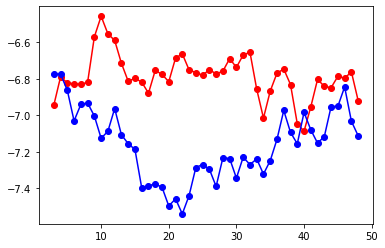

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def get_shape(file_path):
    """
    Read and process a shape file written by DNAShapeR 
    returns: 
        a numpy ndarray
    """
    with open(file_path, "r") as file:
        i = 0
        all_seq_shapes = []
        for data in file.readlines():
            i = i + 1
            if i % 3 == 1:
                continue
            elif i % 3 == 2:
                shape_str: str = data 
            elif i % 3 == 0:
                shape_str: str = shape_str + ',' + data 
                shape_str_list = shape_str.strip().split(sep=',')
                shape_float_list = [ None if val == 'NA' else float(val) for val in shape_str_list ]
                all_seq_shapes.append(shape_float_list)
        
        return np.array(all_seq_shapes)
        
most_1000_shape_arr = get_shape("./data/rl_most_1000.txt.ProT")        
least_1000_shape_arr = get_shape("./data/rl_least_1000.txt.ProT")    
print(most_1000_shape_arr.shape)
print(least_1000_shape_arr.shape)

print(most_1000_shape_arr[:3])

x = np.arange(50)[2:-2] + 1 
ym = most_1000_shape_arr[:,2:-2].mean(axis=0)   
yl = least_1000_shape_arr[:,2:-2].mean(axis=0)

plt.plot(x, ym, linestyle='-', marker='o', color='r')
plt.plot(x, yl, linestyle='-', marker='o', color='b') 
plt.show()
